In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_dots = 20

x = np.linspace(0, 1, n_dots)                   # [0, 1] 之间创建 20 个点
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1;

In [2]:
def plot_polynomial_fit(x, y, order):
    p = np.poly1d(np.polyfit(x, y, order))

    # 画出拟合出来的多项式所表达的曲线以及原始的点
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

<Figure size 1296x288 with 0 Axes>

Text(0.5, 1.0, 'Under Fitting')

Text(0.5, 1.0, 'Fitting')

Text(0.5, 1.0, 'Over Fitting')

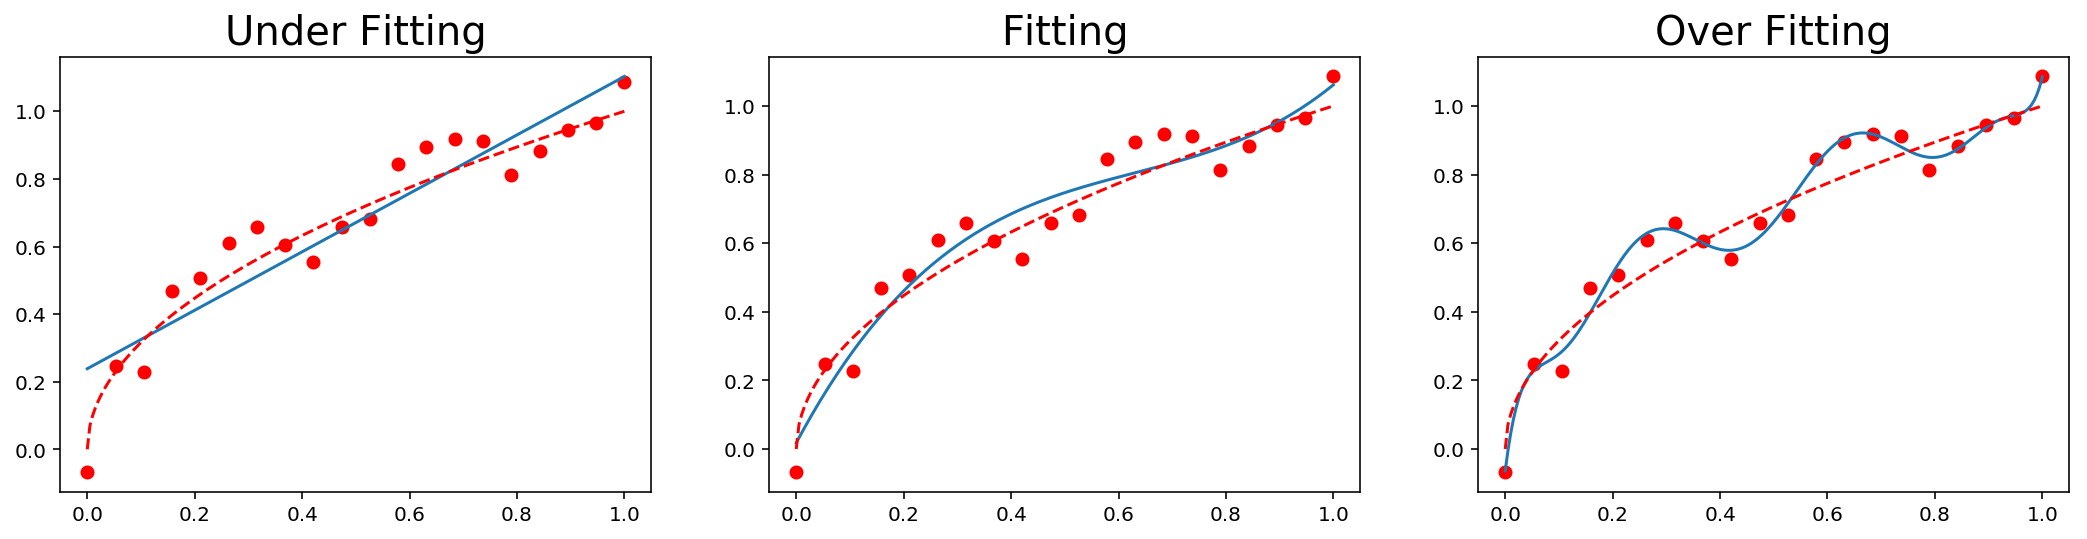

In [4]:
plt.figure(figsize=(18, 4))
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
models = [None, None, None]
for index, order in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    models[index] = plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)

In [5]:
for m in models:
    print('model coeffs: {0}'.format(m.coeffs))

model coeffs: [0.86447757 0.23851626]
model coeffs: [ 2.11261632 -3.99908027  2.93001647  0.01790155]
model coeffs: [ 4.58669635e+03 -1.72895005e+04  2.20881094e+04 -4.84211048e+03
 -1.50375813e+04  1.66199939e+04 -7.75460614e+03  1.83123104e+03
 -2.13802260e+02  1.27183992e+01 -6.36651154e-02]


<Figure size 648x432 with 0 Axes>

Text(-90, -50, 'L1: $y = 0.6 + 0.2x$')

Text(-90, -50, 'L2: $y = 0.2385162589741814 + 0.8644775653394571x$')

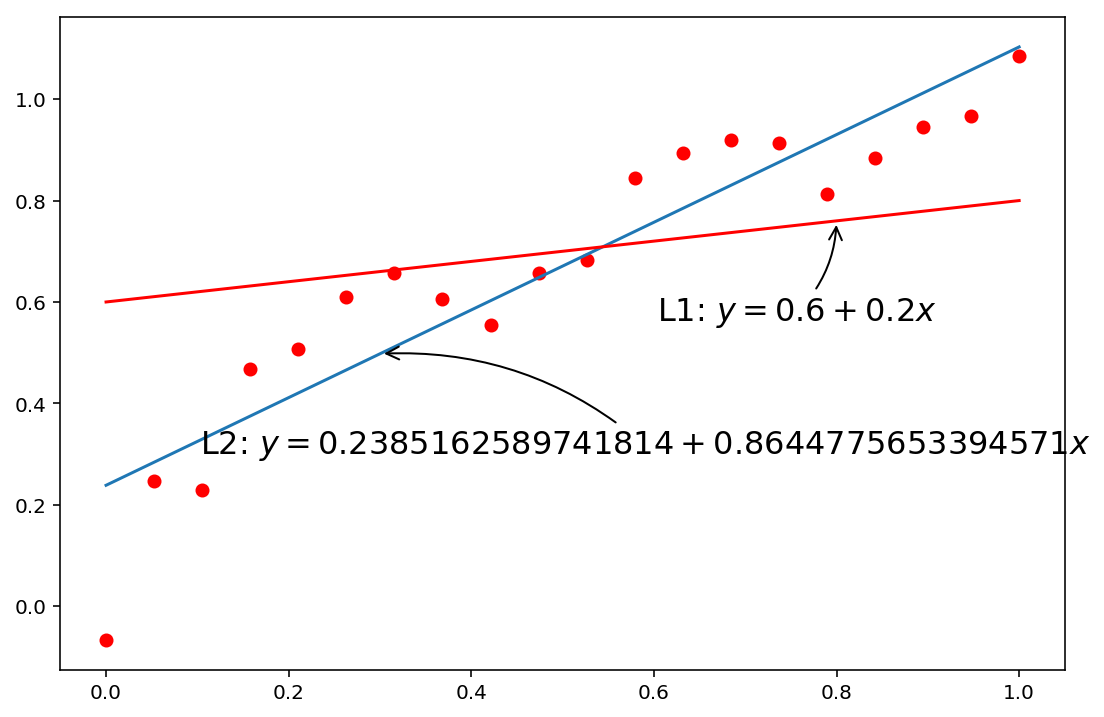

In [6]:
# 针对一阶多项式的模型，不同的参数拟合出来的直线和训练样本对应的位置关系
coeffs_1d = [0.2, 0.6]

plt.figure(figsize=(9, 6))
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'ro', t, models[0](t), '-', t, np.poly1d(coeffs_1d)(t), 'r-')
plt.annotate(r'L1: $y = {1} + {0}x$'.format(coeffs_1d[0], coeffs_1d[1]),
             xy=(0.8, np.poly1d(coeffs_1d)(0.8)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'L2: $y = {1} + {0}x$'.format(models[0].coeffs[0], models[0].coeffs[1]),
             xy=(0.3, models[0](0.3)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))